#### Name Surname: Ahmet Emir Kalafat
#### StudentID: 2021241007
### BU TELAFİ LAB ÇALIŞMASI LAB5 İÇİNDİR.

#### Important Notes: 
Change this file name to **studentId_LabWork5.ipynb**. After finished your work, upload your file to the related field in LMS

### LabWork5 - Feature Engineering

- Please explain in detail and show all your work!

1. Impute the missing values via different ML approcahes. 
2. Chose numeric features, draw density plots and remove outliers with appropriate methods 
3. Chose categorical features, identify outliers and remove them [BONUS].
4. Apply appropriate encoding methods on categorical features.
5. Perform transformation to your numeric features. Why do you need such this transformation?
6. Chose numeric features and perform appropriate scaling/normalization methods. Explain in detail why do you choose that.
7. Draw heat map and pair plot and decide which feature(s) do you select based on your observation.   


In [1]:
# AHMET EMİR KALAFAT 2021241007
# BU LAB ÇALIŞMASI TELAFİ LAB ÇALIŞMASIDIR.

In [2]:
# 1. Impute the missing values via different ML approcahes. 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# ALL NECESSARY IMPORTS

In [4]:
df = pd.read_csv("../../week5/Lab/output_bank_DataFrame.csv")
df.head(8)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41.199408,admin.,NaN,secondary,no,2343.0,yes,no,unknown,5,may,1042,1.000000,50.908677,0.000000,unknown,yes
1,41.199408,admin.,married,secondary,no,45.0,no,no,NaN,5,may,1467,1.000000,-1.000000,0.000000,unknown,yes
2,41.000000,technician,married,NaN,no,1270.0,yes,no,unknown,5,may,1389,1.000000,-1.000000,0.000000,unknown,yes
3,41.199408,NaN,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1.000000,-1.000000,0.833008,unknown,yes
4,54.000000,NaN,married,tertiary,no,184.0,no,no,unknown,5,may,673,2.000000,-1.000000,0.000000,NaN,yes
5,42.000000,management,single,tertiary,no,0.0,yes,yes,unknown,5,may,562,2.000000,-1.000000,0.000000,unknown,yes
6,41.199408,NaN,NaN,tertiary,no,830.0,yes,yes,unknown,6,may,1201,1.000000,-1.000000,0.000000,unknown,yes
7,60.000000,NaN,divorced,secondary,no,545.0,yes,no,unknown,6,may,1030,2.506903,-1.000000,0.000000,unknown,yes


In [5]:
df.isnull().values.any()
df[df.isnull().any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41.199408,admin.,NaN,secondary,no,2343.000000,yes,no,unknown,5,may,1042,1.000000,50.908677,0.000000,unknown,yes
1,41.199408,admin.,married,secondary,no,45.000000,no,no,NaN,5,may,1467,1.000000,-1.000000,0.000000,unknown,yes
2,41.000000,technician,married,NaN,no,1270.000000,yes,no,unknown,5,may,1389,1.000000,-1.000000,0.000000,unknown,yes
3,41.199408,NaN,married,secondary,no,2476.000000,yes,no,unknown,5,may,579,1.000000,-1.000000,0.833008,unknown,yes
4,54.000000,NaN,married,tertiary,no,184.000000,no,no,unknown,5,may,673,2.000000,-1.000000,0.000000,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11155,35.000000,blue-collar,married,secondary,no,80.000000,yes,yes,cellular,21,nov,38,2.000000,172.000000,2.000000,NaN,no
11156,41.199408,NaN,single,secondary,no,-72.000000,yes,no,cellular,7,jul,273,2.506903,-1.000000,0.000000,unknown,no
11157,41.199408,blue-collar,single,primary,no,1547.403549,yes,no,cellular,20,apr,257,1.000000,-1.000000,0.000000,NaN,no
11158,39.000000,NaN,married,secondary,no,1547.403549,no,no,unknown,16,jun,83,4.000000,-1.000000,0.000000,unknown,no


In [6]:
# Using imputer to fill the missing data points

numericDF=df.select_dtypes(include=np.number)

# strategy= 'mean' / 'median' / 'most_frequent' / 'constant'
impMean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')  
impMean.fit(numericDF)
impMean.transform(numericDF[:10])

array([[ 4.11994078e+01,  2.34300000e+03,  5.00000000e+00,
         1.04200000e+03,  1.00000000e+00,  5.09086772e+01,
         0.00000000e+00],
       [ 4.11994078e+01,  4.50000000e+01,  5.00000000e+00,
         1.46700000e+03,  1.00000000e+00, -1.00000000e+00,
         0.00000000e+00],
       [ 4.10000000e+01,  1.27000000e+03,  5.00000000e+00,
         1.38900000e+03,  1.00000000e+00, -1.00000000e+00,
         0.00000000e+00],
       [ 4.11994078e+01,  2.47600000e+03,  5.00000000e+00,
         5.79000000e+02,  1.00000000e+00, -1.00000000e+00,
         8.33008384e-01],
       [ 5.40000000e+01,  1.84000000e+02,  5.00000000e+00,
         6.73000000e+02,  2.00000000e+00, -1.00000000e+00,
         0.00000000e+00],
       [ 4.20000000e+01,  0.00000000e+00,  5.00000000e+00,
         5.62000000e+02,  2.00000000e+00, -1.00000000e+00,
         0.00000000e+00],
       [ 4.11994078e+01,  8.30000000e+02,  6.00000000e+00,
         1.20100000e+03,  1.00000000e+00, -1.00000000e+00,
         0.0000000

In [7]:
numericDF=df.select_dtypes(include=np.number)

impKnn = KNNImputer(n_neighbors=6)
numericDF = pd.DataFrame(impKnn.fit_transform(numericDF), columns=numericDF.columns)
numericDF.head()

,age,balance,day,duration,campaign,pdays,previous
0,41.199408,2343.0,5.0,1042.0,1.0,50.908677,0.000000
1,41.199408,45.0,5.0,1467.0,1.0,-1.000000,0.000000
2,41.000000,1270.0,5.0,1389.0,1.0,-1.000000,0.000000
3,41.199408,2476.0,5.0,579.0,1.0,-1.000000,0.833008
4,54.000000,184.0,5.0,673.0,2.0,-1.000000,0.000000


In [8]:
# 2. Chose numeric features, draw density plots and remove outliers with appropriate methods 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  float64
 1   job        8772 non-null   object 
 2   marital    7952 non-null   object 
 3   education  9190 non-null   object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  float64
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    9912 non-null   object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  float64
 13  pdays      11162 non-null  float64
 14  previous   11162 non-null  float64
 15  poutcome   9596 non-null   object 
 16  deposit    11162 non-null  object 
dtypes: float64(5), int64(2), object(10)
memory usage: 1.4+ MB


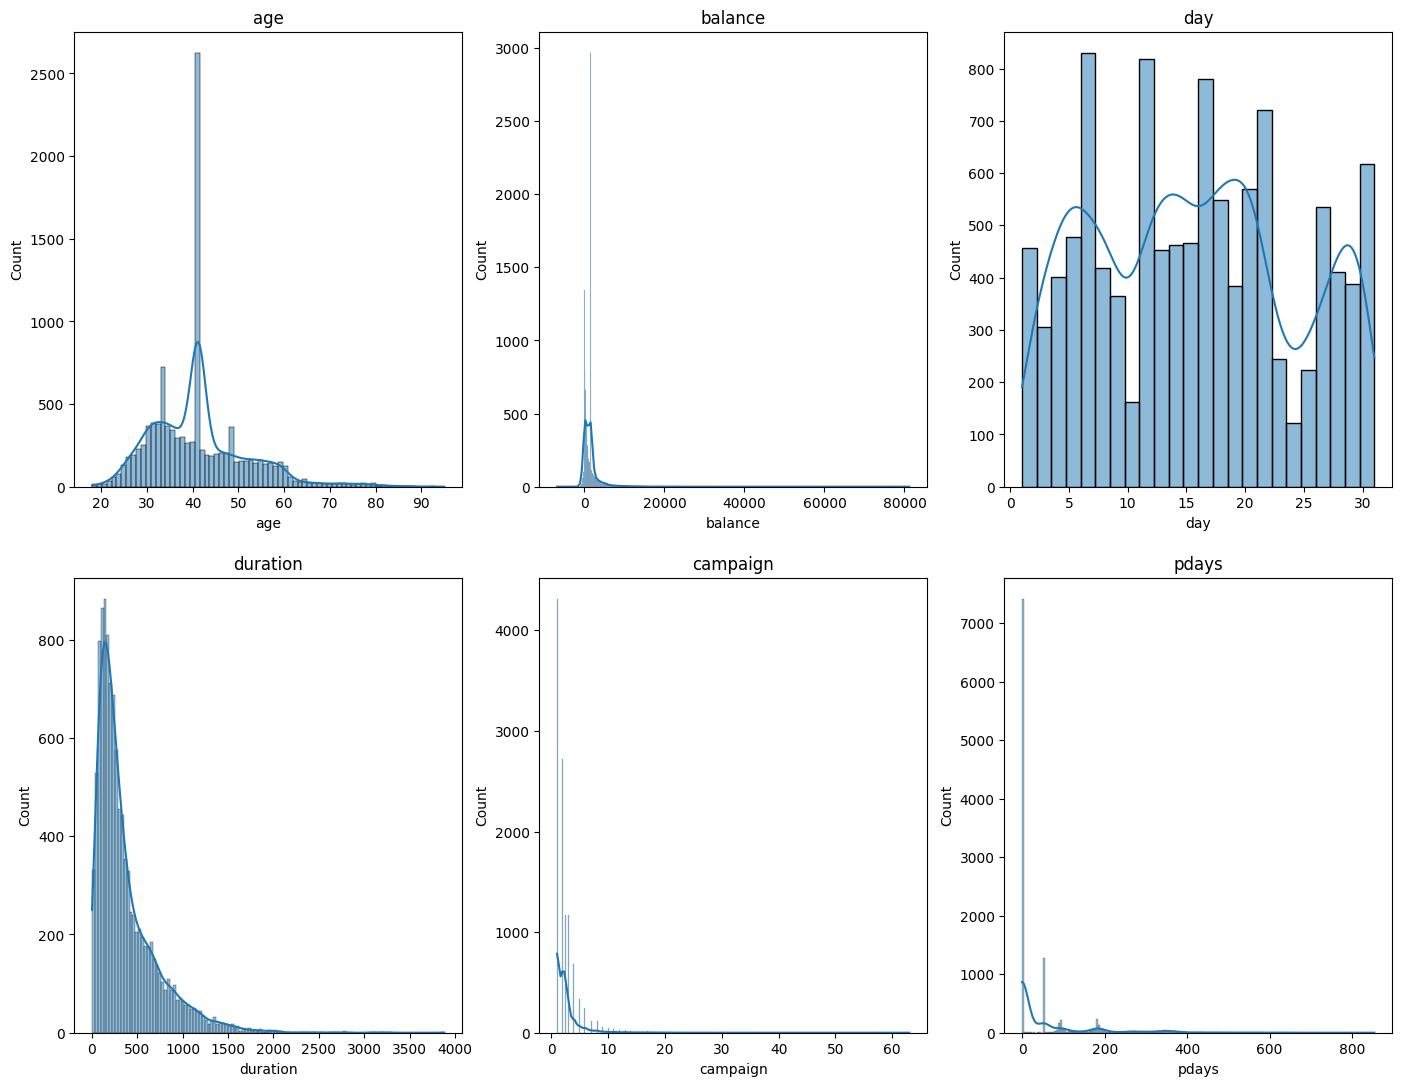

In [10]:
fig, axs = plt.subplots(2,3, figsize = (17,13))

axs[0,0].set_title('age')
sns.histplot(data=df, x='age', kde=True, ax=axs[0,0])
axs[0,1].set_title('balance')
sns.histplot(data=df, x='balance', kde=True, ax=axs[0,1])
axs[0,2].set_title('day')
sns.histplot(data=df, x='day', kde=True, ax=axs[0,2])
axs[1,0].set_title('duration')
sns.histplot(data=df, x='duration', kde=True, ax=axs[1,0])
axs[1,1].set_title('campaign')
sns.histplot(data=df, x='campaign', kde=True, ax=axs[1,1])
axs[1,2].set_title('pdays')
sns.histplot(data=df, x='pdays', kde=True, ax=axs[1,2])

plt.show()

In [11]:
def outlierThresholdsIQR(dataframe, colName, q1=0.25, q3=0.75):
    Q1 = dataframe[colName].quantile(q1)
    Q3 = dataframe[colName].quantile(q3)
    IQR = Q3 - Q1
    upperBoundary = Q3 + 1.5 * IQR
    lowerBoundary = Q1 - 1.5 * IQR
    return lowerBoundary, upperBoundary

In [12]:
# Lets add check outlier function for further needs (Return Boolean)
def checkOutlierIQR(dataframe, colName):
    lowerBoundary, upperBoundary = outlierThresholdsIQR(dataframe, colName)
    if dataframe[(dataframe[colName] > upperBoundary) | (dataframe[colName] < lowerBoundary)].any(axis=1).astype(int).sum() :
        return True
    else:
        return False

In [13]:
# Dropping the outlier data points
def removeOutlierIQR(dataframe, colName):
    lowerBoundary, upperBoundary = outlierThresholdsIQR(dataframe, colName)
    withoutOutliers = dataframe[~((dataframe[colName] < lowerBoundary) | (dataframe[colName] > upperBoundary))]
    return withoutOutliers

In [14]:
outlierThresholdsIQR(df, 'age')

(16.0, 64.0)

In [15]:
checkOutlierIQR(df, 'age')

True

In [16]:
removeOutlierIQR(df, "age").shape

(10841, 17)

In [17]:
outlierThresholdsIQR(df, 'duration')

(-399.0, 1033.0)

In [18]:
checkOutlierIQR(df, 'duration')

True

In [19]:
removeOutlierIQR(df, "duration").shape

(10526, 17)

In [20]:
# 3. Chose categorical features, identify outliers and remove them [BONUS].

In [21]:
# 4. Apply appropriate encoding methods on categorical features.

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41.199408,admin.,NaN,secondary,no,2343.0,yes,no,unknown,5,may,1042,1.0,50.908677,0.000000,unknown,yes
1,41.199408,admin.,married,secondary,no,45.0,no,no,NaN,5,may,1467,1.0,-1.000000,0.000000,unknown,yes
2,41.000000,technician,married,NaN,no,1270.0,yes,no,unknown,5,may,1389,1.0,-1.000000,0.000000,unknown,yes
3,41.199408,NaN,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1.0,-1.000000,0.833008,unknown,yes
4,54.000000,NaN,married,tertiary,no,184.0,no,no,unknown,5,may,673,2.0,-1.000000,0.000000,NaN,yes


In [23]:
df.job.unique()

array(['admin.', 'technician', nan, 'management', 'services',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'retired', 'self-employed', 'student', 'unknown'], dtype=object)

In [24]:
# Encode Court Speed column labels into integer values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(df['job'].values)

print("Encoded job column labels are:\n", (y))

Encoded job column labels are:
 [ 0  0  9 ... 12  9  9]


In [25]:
le.inverse_transform([0,1])

array(['admin.', 'blue-collar'], dtype=object)

In [26]:
df['Jobs Encoded']=y
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Jobs Encoded
0,41.199408,admin.,NaN,secondary,no,2343.0,yes,no,unknown,5,may,1042,1.0,50.908677,0.000000,unknown,yes,0
1,41.199408,admin.,married,secondary,no,45.0,no,no,NaN,5,may,1467,1.0,-1.000000,0.000000,unknown,yes,0
2,41.000000,technician,married,NaN,no,1270.0,yes,no,unknown,5,may,1389,1.0,-1.000000,0.000000,unknown,yes,9
3,41.199408,NaN,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1.0,-1.000000,0.833008,unknown,yes,12
4,54.000000,NaN,married,tertiary,no,184.0,no,no,unknown,5,may,673,2.0,-1.000000,0.000000,NaN,yes,12


In [27]:
# 5. Perform transformation to your numeric features. Why do you need such this transformation?

In [28]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Jobs Encoded
0,41.199408,admin.,NaN,secondary,no,2343.0,yes,no,unknown,5,may,1042,1.0,50.908677,0.0,unknown,yes,0
1,41.199408,admin.,married,secondary,no,45.0,no,no,NaN,5,may,1467,1.0,-1.000000,0.0,unknown,yes,0
2,41.000000,technician,married,NaN,no,1270.0,yes,no,unknown,5,may,1389,1.0,-1.000000,0.0,unknown,yes,9


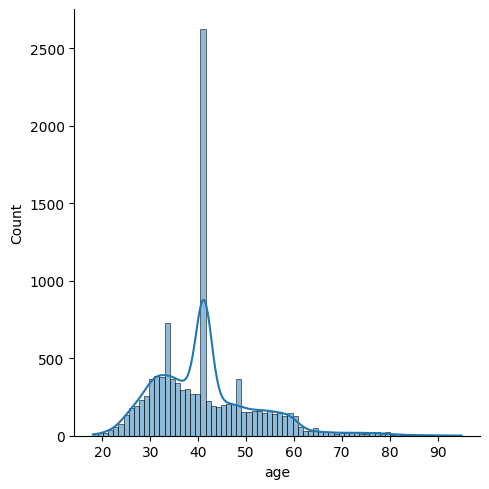

In [29]:
sns.displot(data=df, x='age', kde=True)

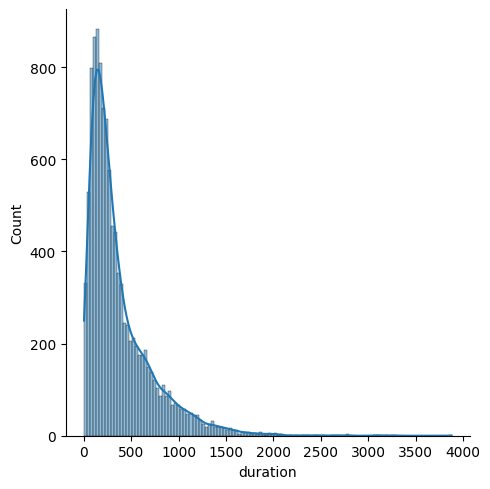

In [30]:
sns.displot(data=df, x='duration', kde=True) ## i prefer duration column for transformation

In [31]:
def logTransform(df, xFeature):
# We add 1 to number to make sure dataset doesn't have any empty number in future to be transformed
    return (np.log10(1+ df[[xFeature]]))

In [32]:
logTransRadiusMean=logTransform(df, 'duration')
df['logarithmicTransDuration'] = logTransRadiusMean
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Jobs Encoded,logarithmicTransDuration
0,41.199408,admin.,NaN,secondary,no,2343.0,yes,no,unknown,5,may,1042,1.0,50.908677,0.000000,unknown,yes,0,3.018284
1,41.199408,admin.,married,secondary,no,45.0,no,no,NaN,5,may,1467,1.0,-1.000000,0.000000,unknown,yes,0,3.166726
2,41.000000,technician,married,NaN,no,1270.0,yes,no,unknown,5,may,1389,1.0,-1.000000,0.000000,unknown,yes,9,3.143015
3,41.199408,NaN,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1.0,-1.000000,0.833008,unknown,yes,12,2.763428
4,54.000000,NaN,married,tertiary,no,184.0,no,no,unknown,5,may,673,2.0,-1.000000,0.000000,NaN,yes,12,2.828660


<Axes: xlabel='logarithmicTransDuration', ylabel='Count'>

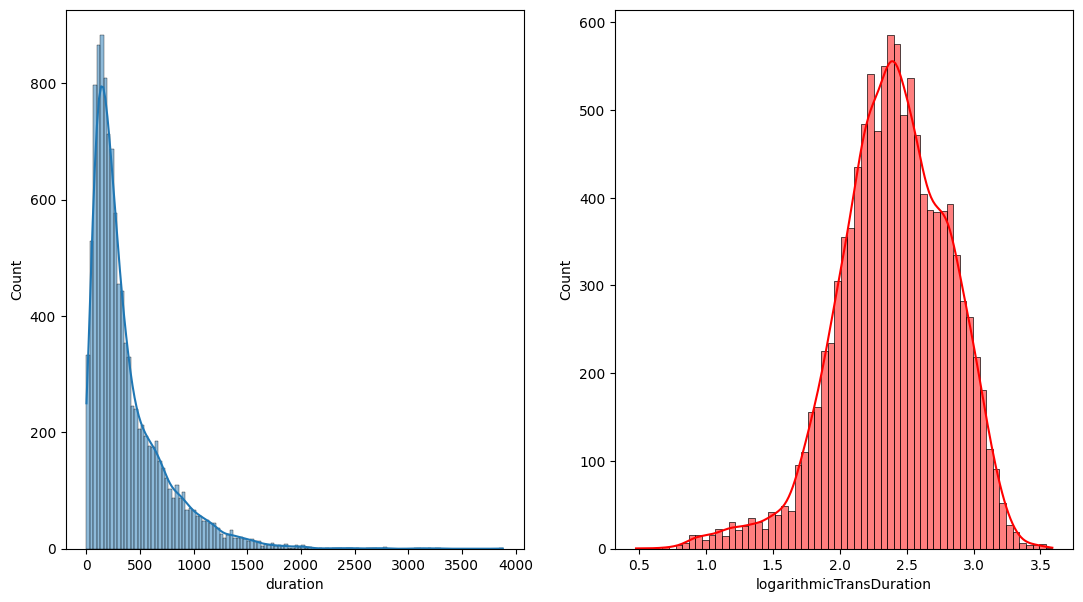

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

sns.histplot(data=df, x='duration', kde=True, ax = ax[0])
sns.histplot(data=df, x='logarithmicTransDuration', kde=True, color ="red", ax = ax[1])

In [34]:
# 6. Chose numeric features and perform appropriate scaling/normalization methods. 
# Explain in detail why do you choose that.

In [35]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scaledDfRnd = mms.fit_transform(numericDF)
scaledDfRnd = pd.DataFrame(scaledDfRnd)
scaledDfRnd.head(3)

,0,1,2,3,4,5,6
0,0.301291,0.104371,0.133333,0.268110,0.0,0.060712,0.0
1,0.301291,0.078273,0.133333,0.377675,0.0,0.000000,0.0
2,0.298701,0.092185,0.133333,0.357566,0.0,0.000000,0.0


In [36]:
# 7. Draw heat map and pair plot and decide which feature(s) do you select based on your observation.   


In [37]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Jobs Encoded,logarithmicTransDuration
0,41.199408,admin.,NaN,secondary,no,2343.0,yes,no,unknown,5,may,1042,1.0,50.908677,0.000000,unknown,yes,0,3.018284
1,41.199408,admin.,married,secondary,no,45.0,no,no,NaN,5,may,1467,1.0,-1.000000,0.000000,unknown,yes,0,3.166726
2,41.000000,technician,married,NaN,no,1270.0,yes,no,unknown,5,may,1389,1.0,-1.000000,0.000000,unknown,yes,9,3.143015
3,41.199408,NaN,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1.0,-1.000000,0.833008,unknown,yes,12,2.763428
4,54.000000,NaN,married,tertiary,no,184.0,no,no,unknown,5,may,673,2.0,-1.000000,0.000000,NaN,yes,12,2.828660


<Axes: >

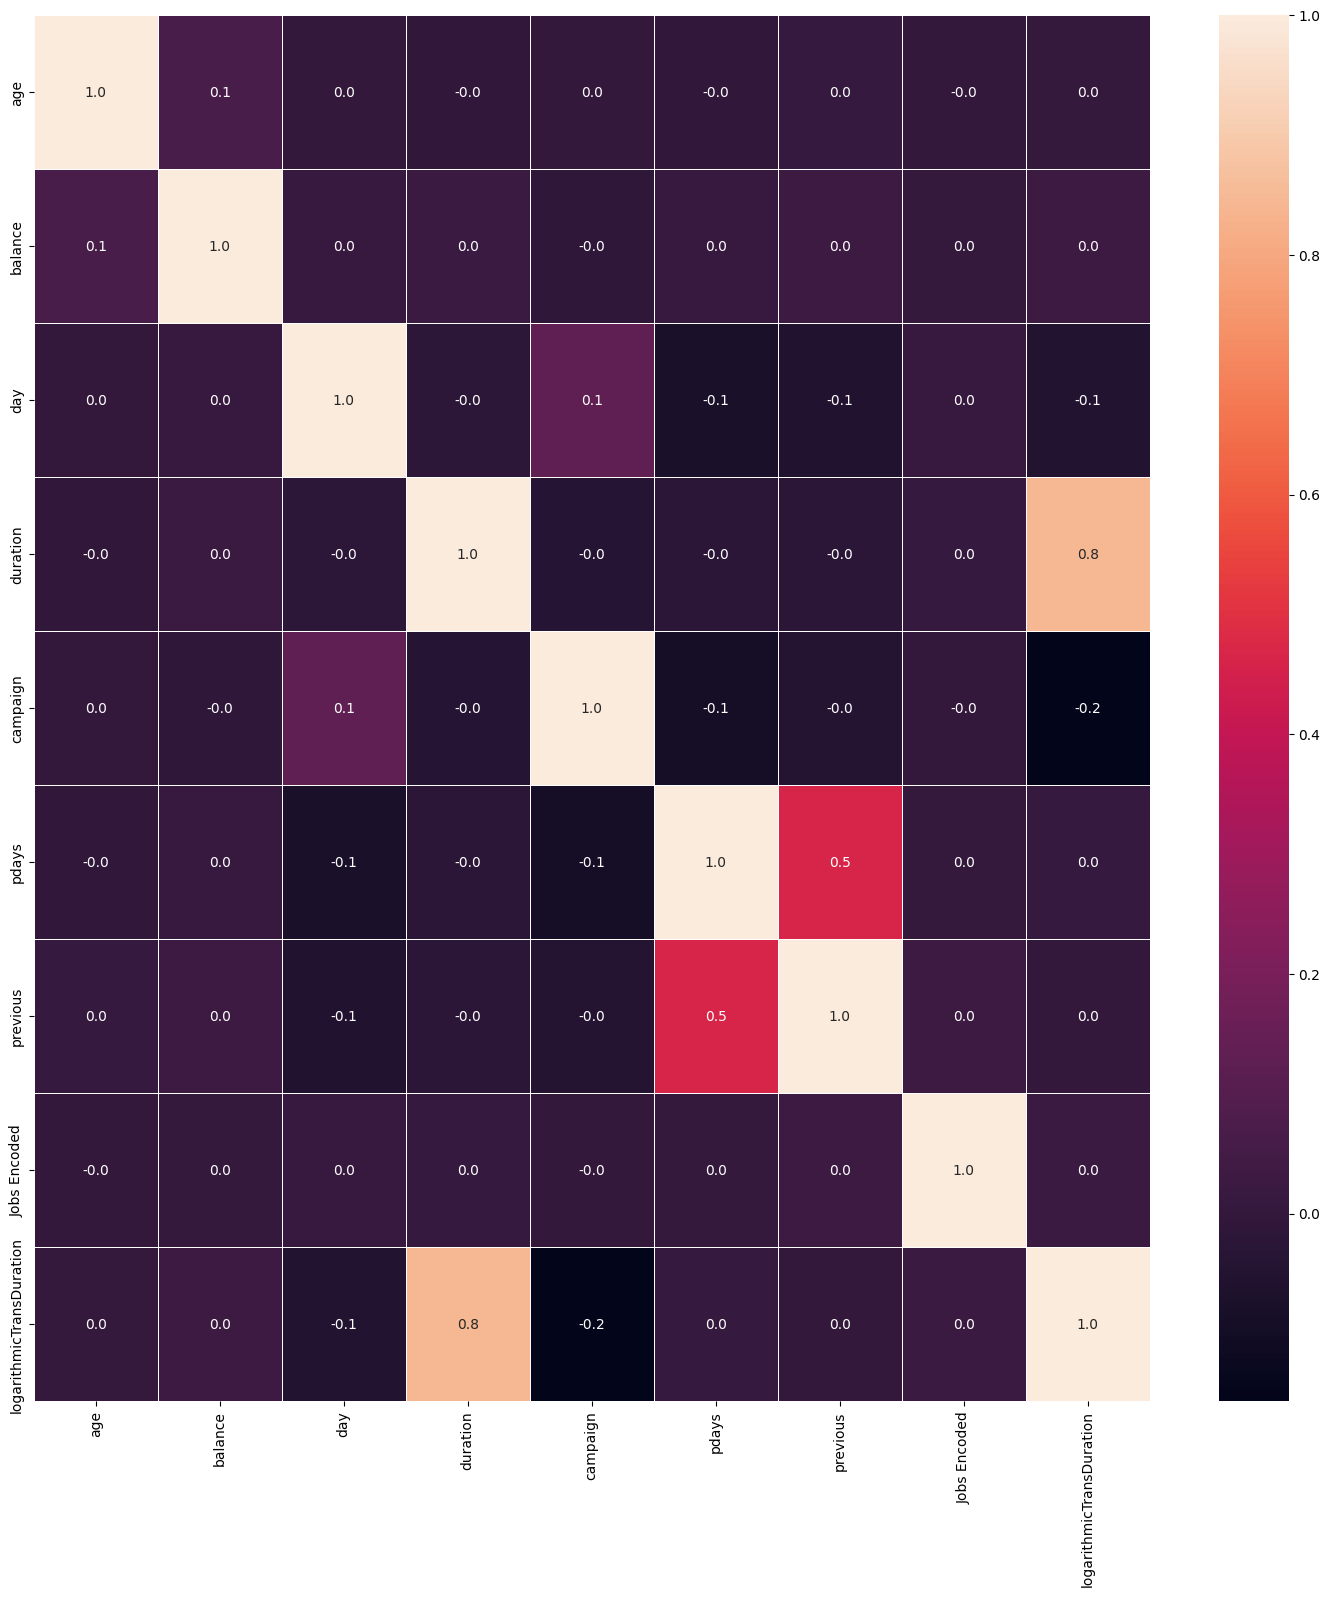

In [38]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because n

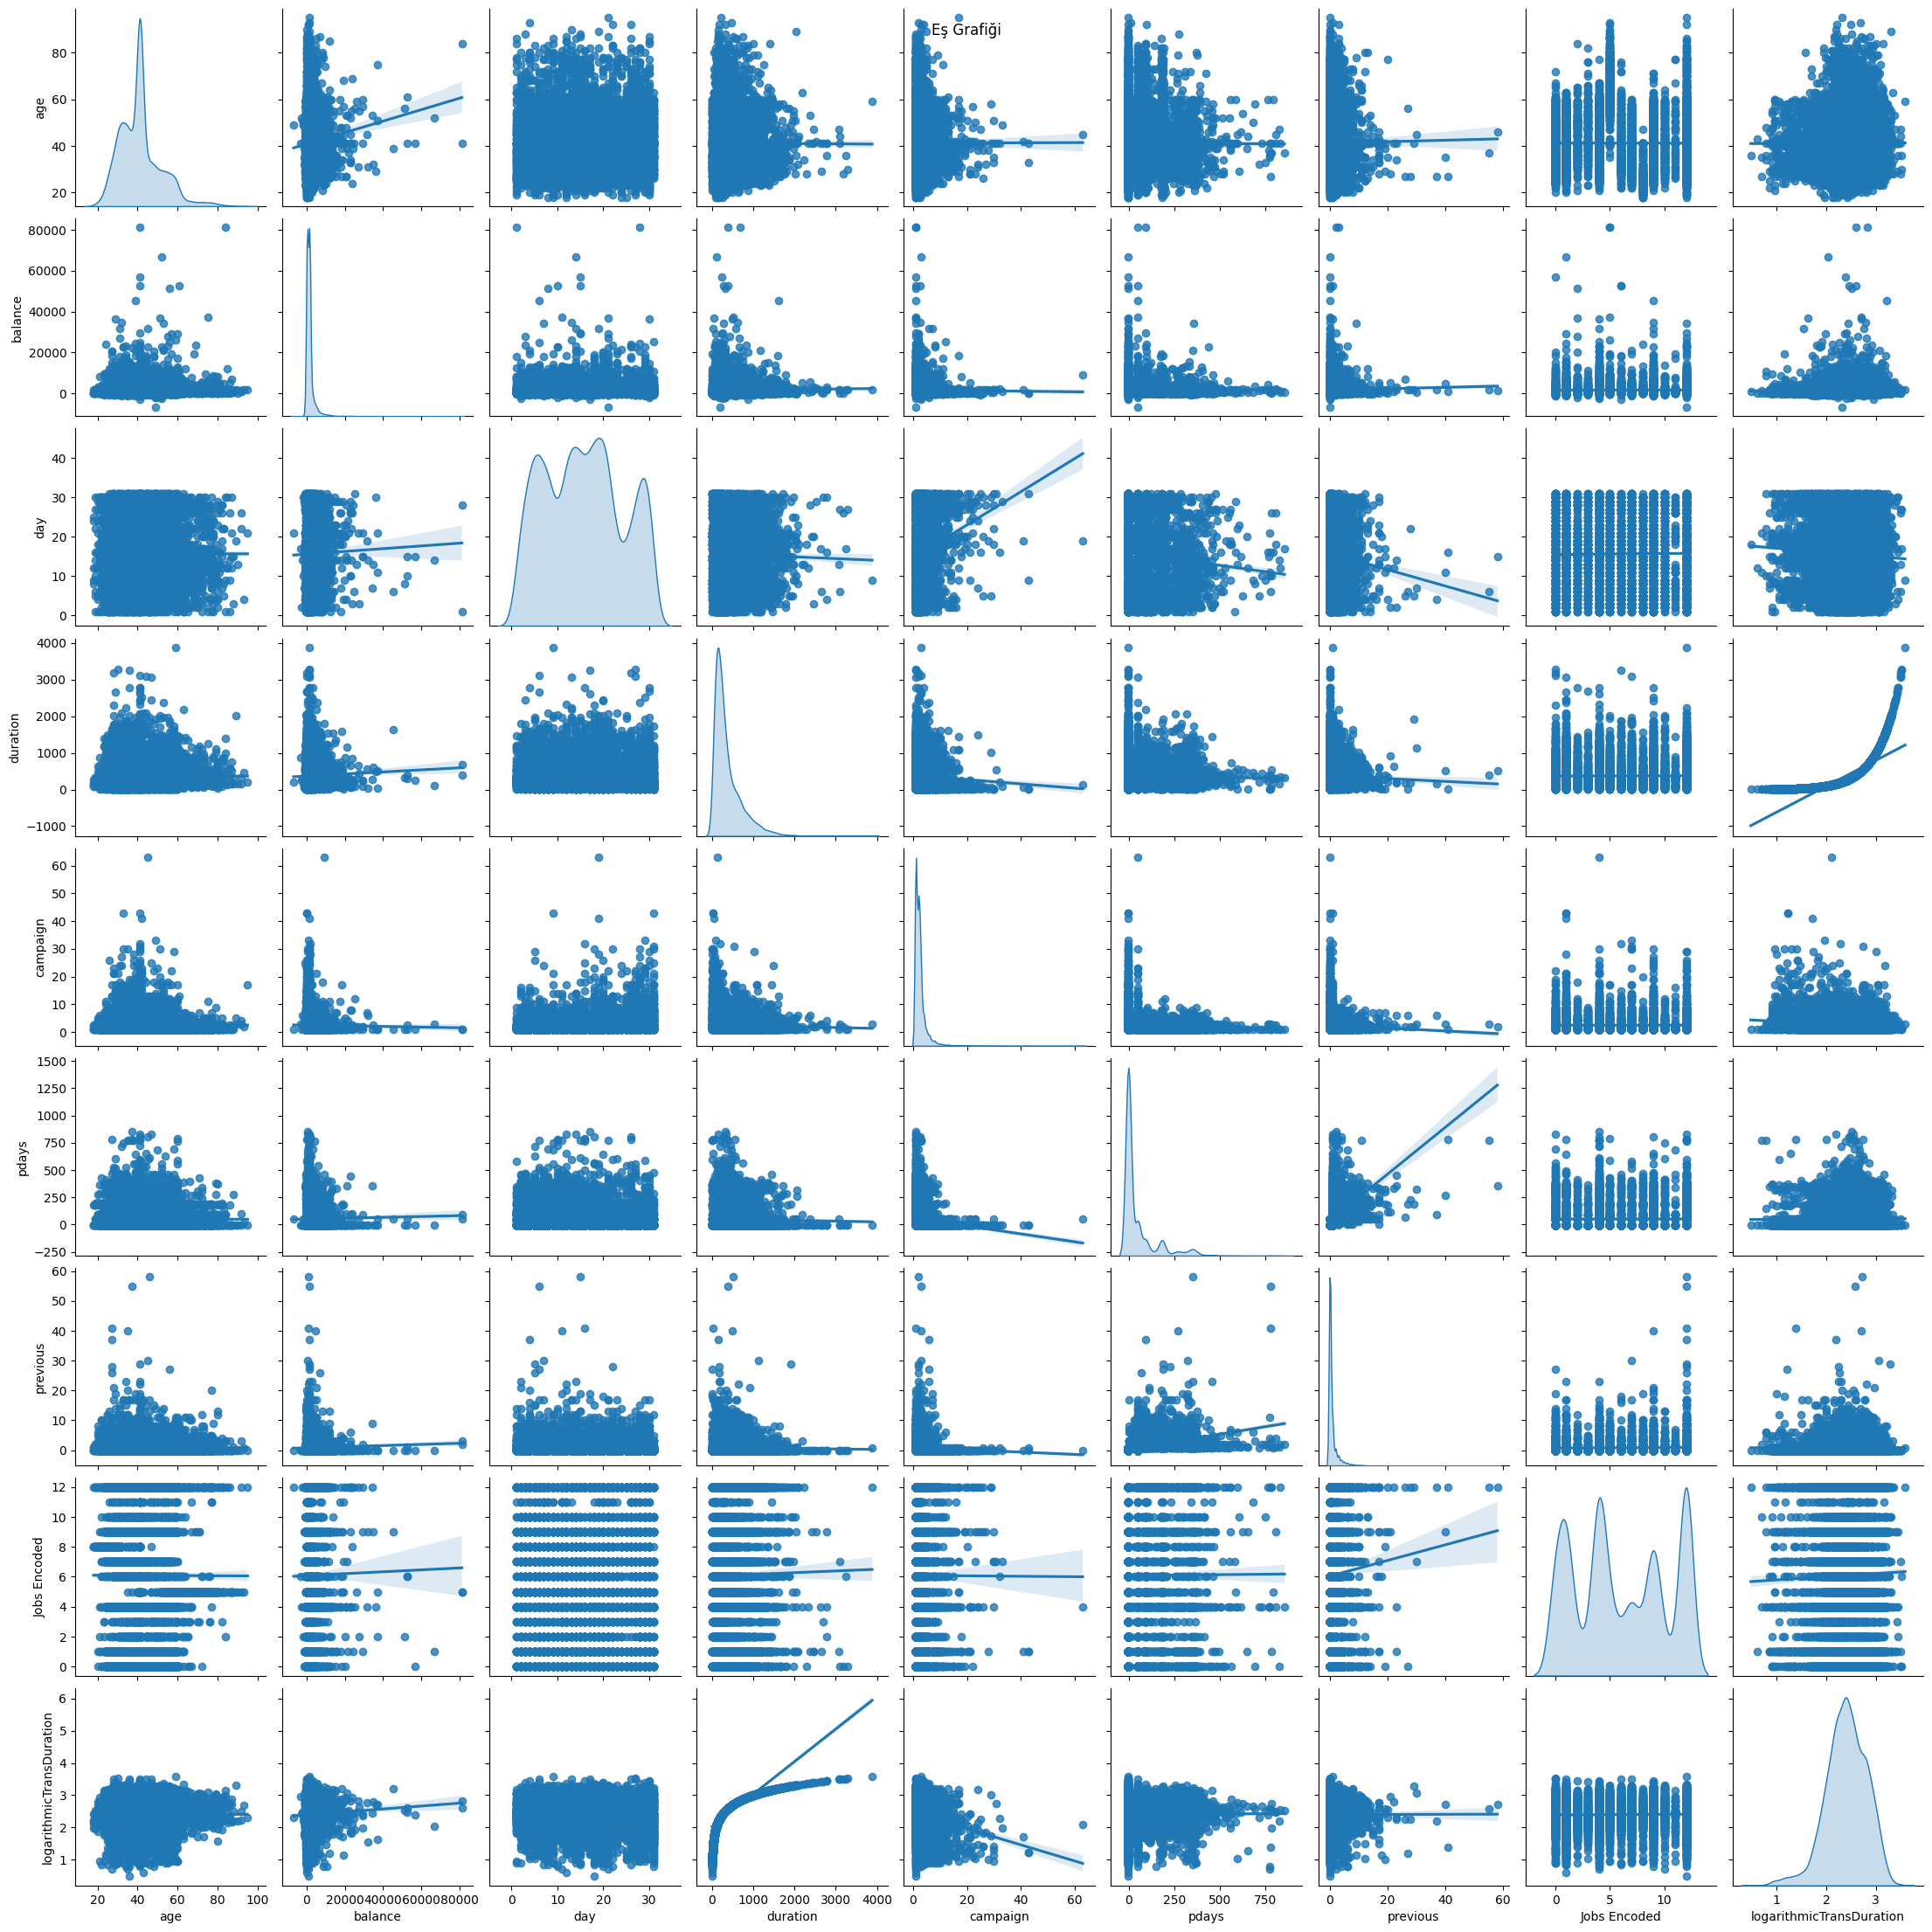

In [39]:
sns.pairplot(df, diag_kind='kde', kind='reg', palette='husl')
plt.suptitle('Eş Grafiği')
plt.show()